In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
csv_file = pd.read_csv("/Users/a90530/Downloads/akbank/dataset/rawData.csv")
df = pd.DataFrame(csv_file)

In [10]:
def veri_inceleme(df):
    print("\nDataframe'in ilk 5 tanesi")
    print(df.head())
    print("\n\nDataframe'in columnları")
    print(df.columns)
    print("\n\nDataframe hakkında istatistiksel bilgi")
    print(df.describe())
    print("\nColumn Sayısı:")
    print(df.shape)
    print("\n\nDataframe hakkındaki bilgileri verir")
    print(df.info())
    print("\n\nDataframe'deki boş girilen hücreleri gösterir")
    print(df.isnull().sum())
veri_inceleme(df)


Dataframe'in ilk 5 tanesi
   id                                              title       postingDate  \
0   1                                     Care Home Cook  07 November 2023   
1   2                                     Care Assistant  07 November 2023   
2   3                        Senior Sister Critical Care  07 November 2023   
3   4  Critical Care Clinical Skills and Learning Fac...  07 November 2023   
4   5                                     Health Visitor  07 November 2023   

                              salary      hours       closingDate  \
0                    £12.50 per hour  Part time  07 December 2023   
1          £10.80 to £11.00 per hour  Part time  07 December 2023   
2  £43,742.00 to £50,056.00 per year  Full time  21 November 2023   
3  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   
4  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   

              location               state  city              company  \
0          Dover

In [11]:
#Kullanılmayacak verilerin ve null değerlerin silinmesi işlemi
df = df.drop(columns=['additionalSalaryInf','jobReference'])
df = df.dropna()

In [12]:
# Range şeklinde belirlenmiş maaş değerlerini nümerik değer haline getirme işlemi
def convert_salary_to_hourly(salary):
    if 'year' in salary:
        # Alt sınırı gerçek maaş olarak belirleme
        lower_bound_str = salary.split(' to ')[0].replace('£', '').replace(',', '').strip()
        lower_bound_str = lower_bound_str.split('per')[0]
        lower_bound = float(lower_bound_str)
        # 1 yıl içerisinde 2080 saat çalışma saati varsayımı yapıldı
        hourly_rate = lower_bound / 2080
        return round(float(hourly_rate), 2)
    elif 'hour' in salary:
        # Alt sınırı gerçek maaş olarak belirleme
        lower_bound_str = salary.split(' to ')[0].replace('£', '').replace(',', '').strip()
        lower_bound_str = lower_bound_str.split('per')[0]
        return round(float(lower_bound_str), 2)

# Apply fonksiyonu ile salary sütununa "extract_salary" fonksiyonunu uyguluyoruz
df['salary_numeric'] = df['salary'].apply(convert_salary_to_hourly)
df.dropna(subset=['salary_numeric'], inplace=True)

In [13]:
import sys
sys.path.append('/Users/a90530/Downloads/akbank/modules')
from local_outlier import LocalOutlierDetection

#Aykırı değerlerin değişmesi
outlier_detection = LocalOutlierDetection()
outlier_detection.set_neighbors(20)
df['salary_numeric'] = outlier_detection.remove_outliers(df, 'salary_numeric')['salary_numeric']

DEBUG: Aykırı Değerleri Düzeltildi:
      index  salary_numeric
0         0        65.88479
1         1        65.88479
2         2        65.88479
3         3        65.88479
31       33        65.88479
...     ...             ...
9599  15647        65.88479
9600  15650        65.88479
9601  15651        65.88479
9602  15652        65.88479
9603  15653        65.88479

[961 rows x 2 columns]


Successfully loaded translations: {'Accounting & Finance Jobs': 'Muhasebe ve Finans', 'Admin Jobs': 'İdari İşler', 'Agriculture, Fishing & Forestry Jobs': 'Tarım, Balıkçılık ve Ormancılık', 'Consultancy Jobs': 'Danışmanlık İşleri', 'Creative & Design Jobs': 'Tasarım', 'Customer Services Jobs': 'Müşteri Hizmetleri', 'Domestic Help & Cleaning Jobs': 'Ev Yardımcılığı ve Temizlik', 'Energy, Oil & Gas Jobs': 'Enerji, Petrol ve Gaz', 'Engineering Jobs': 'Mühendislik', 'Graduate Jobs': 'Yeni Mezunlar için İş', 'HR & Recruitment Jobs': 'İnsan Kaynakları', 'Healthcare & Nursing Jobs': 'Sağlık ve Hemşirelik', 'Hospitality & Catering Jobs': 'Konaklama ve Yemek', 'IT Jobs': 'Bilgi Teknolojisi', 'Legal Jobs': 'Hukuk', 'Logistics & Warehouse Jobs': 'Lojistik ve Depo', 'Maintenance Jobs': 'Bakım ', 'Manufacturing Jobs': 'Üretim ', 'Other/General Jobs': 'Diğer/Genel', 'PR, Advertising & Marketing Jobs': 'Halkla İlişkiler, Reklam ve Pazarlama', 'Property Jobs': 'Gayrimenkul', 'Retail Jobs': 'Perakende'

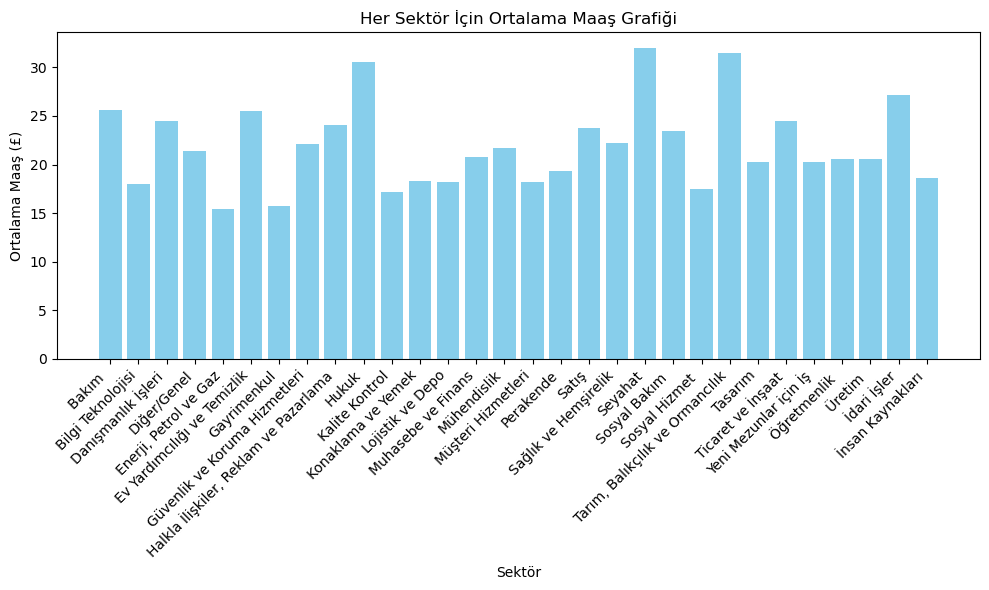

In [14]:
sys.path.append('/Users/a90530/Downloads/akbank/modules')
from translator import CategoryTranslator


translator = CategoryTranslator("/Users/a90530/Downloads/akbank/translations.json")

#Translator modulü kullanılarak kategorilerin daha iyi anlaşılması adına çeviri işlemi
df['translated_category'] = translator.translate_categories(df, 'category')['translated_category']

# Sektörlere göre ortalama maaş dağılımı
average_salary_by_category = df.groupby("translated_category")["salary_numeric"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_salary_by_category["translated_category"], average_salary_by_category["salary_numeric"], color='skyblue')
plt.xlabel('Sektör')
plt.ylabel('Ortalama Maaş (£)')
plt.title('Her Sektör İçin Ortalama Maaş Grafiği')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
